## Norm and distance

#### Norm

The *Euclidean norm* of an $n$-vector $x$ (named after the Greek mathematician Euclid), denoted $\|x\|$, is the squareroot of the sum of the squares of its elements,
$$
\|x\|=\sqrt{x_1^2+x_2^2+\cdots+x_n^2} .
$$
The Euclidean norm can also be expressed as the squareroot of the inner product of the vector with itself, i.e., $\|x\|=\sqrt{x^T x}$.

#### Properties of norm.

Some important properties of the Euclidean norm are given below. Here $x$ and $y$ are vectors of the same size, and $\beta$ is a scalar.

- Nonnegative homogeneity. $\|\beta x\|=|\beta|\|x\|$. Multiplying a vector by a scalar multiplies the norm by the absolute value of the scalar.
- Triangle inequality. $\|x+y\| \leq\|x\|+\|y\|$. The Euclidean norm of a sum of two vectors is no more than the sum of their norms. (The name of this property will be explained later.) Another name for this inequality is subadditivity.
- Nonnegativity. $\|x\| \geq 0$.
- Definiteness. $\|x\|=0$ only if $x=0$.

In [ ]:
import numpy as np
import numpy.linalg as npl

x = np.array([2, -1, 2])
print(npl.norm(x), np.sqrt(np.inner(x,x)), np.sqrt(sum(np.array(x)**2)))

x,y = np.random.randn(10), np.random.randn(10)
print(x)
print(npl.norm(x+y) <= npl.norm(x) + npl.norm(y))
print(npl.norm(x+y))
print(npl.norm(x) + npl.norm(y))

3.0 3.0 3.0
[ 0.70550726 -0.62490446 -0.47629894 -0.84193625  0.20505382 -0.99761176
 -0.97762532 -0.33762024 -0.37718673  0.76033673]
True
3.698362812244354
5.375570432025827


#### Root-mean-square value.

The norm is related to the *root-mean-square* (RMS) value of an $n$-vector $x$, defined as
$$
\operatorname{rms}(x)=\sqrt{\frac{x_1^2+\cdots+x_n^2}{n}}=\frac{\|x\|}{\sqrt{n}} .
$$
The argument of the squareroot in the middle expression is called the mean square value of $x$, denoted $\mathbf{m s}(x)$, and the RMS value is the squareroot of the mean square value. The RMS value of a vector $x$ is useful when comparing norms of vectors with different dimensions; the RMS value tells us what a 'typical' value of $\left|x_i\right|$ is. For example, the norm of $\mathbf{1}$, the $n$-vector of all ones, is $\sqrt{n}$, but its RMS value is 1 , independent of $n$. More generally, if all the entries of a vector are the same, say, $\alpha$, then the RMS value of the vector is $|\alpha|$.

In [ ]:
rms = lambda x: npl.norm(x) / np.sqrt(len(x))
t = np.linspace(0,1,101) #t = 0:.01:1
x = np.cos(8 * t) - 2 * np.sin(11 * t)

print('average:', np.average(x))
print('root mean square:', rms(x))
print('x:', x)

average: -0.042529437832386816
root mean square: 1.0837556422598
x: [ 1.          0.7772451   0.55076804  0.32325192  0.09735649 -0.12431346
 -0.33923878 -0.54501537 -0.739382   -0.92024623 -1.08570801 -1.23408086
 -1.36391021 -1.47398886 -1.56336921 -1.6313723  -1.67759342 -1.70190437
 -1.7044522  -1.68565468 -1.64619233 -1.58699731 -1.50923924 -1.41430817
 -1.30379488 -1.17946882 -1.04325395 -0.8972028  -0.74346905 -0.58427899
 -0.42190233 -0.25862246 -0.09670686  0.06162219  0.21421621  0.35902793
  0.49413741  0.61777625  0.7283499   0.82445752  0.90490937  0.96874134
  1.01522657  1.04388392  1.05448331  1.04704772  1.02185198  0.97941823
  0.92050825  0.84611263  0.75743703  0.65588565  0.54304213  0.42064812
  0.2905798   0.15482271  0.01544505 -0.12543001 -0.26565282 -0.40307609
 -0.53558374 -0.66111939 -0.7777141  -0.88351311 -0.97680105 -1.05602551
 -1.11981852 -1.16701567 -1.19667275 -1.20807953 -1.20077059 -1.17453306
 -1.12941109 -1.06570712 -0.98397969 -0.88503813 -0.7699

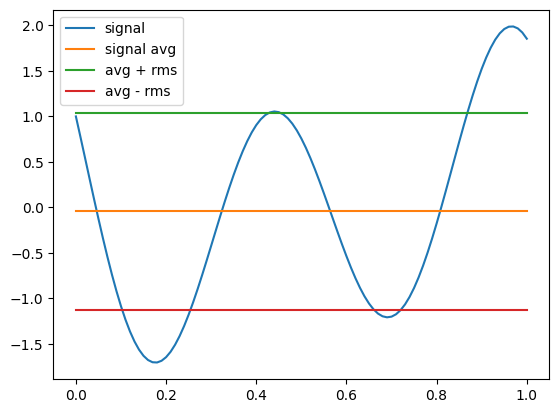

In [ ]:
import matplotlib.pyplot as plt
fig, _ = plt.subplots()

plt.plot(t,x) # some signal
plt.plot(t, np.average(x) * np.ones(len(x))) # average of the signal:yellow
plt.plot(t, (np.average(x) + rms(x)) * np.ones(len(x))) # average + rms:green
plt.plot(t, (np.average(x) - rms(x)) * np.ones(len(x))) # average - rms:red
plt.legend(('signal','signal avg', 'avg + rms', 'avg - rms'), loc=0)


In [ ]:
plt.close(fig)

#### Norm of a sum.

A useful formula for the norm of the sum of two vectors $x$ and $y$ is
$$
\|x+y\|=\sqrt{\|x\|^2+2 x^T y+\|y\|^2}.
$$


#### Chebyshev inequality.

Suppose that $x$ is an $n$-vector, and that $k$ of its entries satisfy $\left|x_i\right| \geq a$, where $a>0$. Then $k$ of its entries satisfy $x_i^2 \geq a^2$. It follows that
$$
\|x\|^2=x_1^2+\cdots+x_n^2 \geq k a^2
$$
since $k$ of the numbers in the sum are at least $a^2$, and the other $n-k$ numbers are nonnegative. We can conclude that $k \leq\|x\|^2 / a^2$, which is called the *Chebyshev inequality*, after the mathematician Pafnuty Chebyshev. When $\|x\|^2 / a^2 \geq n$, the inequality tells us nothing, since we always have $k \leq n$. In other cases it limits the number of entries in a vector that can be large. For $a>\|x\|$, the inequality is $k \leq\|x\|^2 / a^2<1$, so we conclude that $k=0$ (since $k$ is an integer). In other words, no entry of a vector can be larger in magnitude than the norm of the vector.

The Chebyshev inequality is easier to interpret in terms of the RMS value of a vector. We can write it as
$$
\frac{k}{n} \leq\left(\frac{\operatorname{rms}(x)}{a}\right)^2,
$$
where $k$ is, as above, the number of entries of $x$ with absolute value at least $a$. The left-hand side is the fraction of entries of the vector that are at least $a$ in absolute value. The right-hand side is the inverse square of the ratio of $a$ to $\mathbf{r m s}(x)$.

In [ ]:
cheb_bound = lambda x, a: npl.norm(x) ** 2 // a
a = 1.5

cheb_bound(x, a), len(x), len([i for i in x if np.abs(i) >= a])
# This says there can be *at most*:
# 79 of the 101 values in x, with an absolute value of at least 1.5
# in fact, there are 20

(79.0, 101, 20)

## Distance

#### Euclidean distance.

We can use the norm to define the Euclidean distance between two vectors $a$ and $b$ as the norm of their difference:
$$
\operatorname{dist}(a, b)=\|a-b\|.
$$
For one, two, and three dimensions, this distance is exactly the usual distance between points with coordinates $a$ and $b$. But the Euclidean distance is defined for vectors of any dimension; we can refer to the distance between two vectors of dimension 100. Since we only use the Euclidean norm in this book, we will refer to the Euclidean distance between vectors as, simply, the distance between the vectors. If $a$ and $b$ are $n$-vectors, we refer to the RMS value of the difference, $\|a-b\| / \sqrt{n}$, as the $R M S$ deviation between the two vectors.

#### Examples

> ##### Feature distance
>
> If $x$ and $y$ represent vectors of $n$ features of two objects, the quantity $\|x-y\|$ is called the feature distance, and gives a measure of how different the objects are (in terms of their feature values). Suppose for example the feature vectors are associated with patients in a hospital, with entries such as weight, age, presence of chest pain, difficulty breathing, and the results of tests. We can use feature vector distance to say that one patient case is near another one (at least in terms of their feature vectors).

> ##### RMS prediction error
>
> Suppose that the $n$-vector $y$ represents a time series of some quantity, for example, hourly temperature at some location, and $\hat{y}$ is another $n$-vector that represents an estimate or prediction of the time series $y$, based on other information. The difference $y-\hat{y}$ is called the prediction error, and its RMS value $\mathbf{r m s}(y-\hat{y})$ is called the _$R M S$ prediction error_. If this value is small (say, compared to rms $(y)$ ) the prediction is good.

> ##### Document dissimilarity
>
> Suppose $n$-vectors $x$ and $y$ represent the histograms of word occurrences for two documents. Then $\|x-y\|$ represents a measure of the dissimilarity of the two documents. We might expect the dissimilarity to be smaller when the two documents have the same genre, topic, or author; we would expect it to be larger when they are on different topics, or have different authors. As an example we form the word count histograms for the 5 Wikipedia articles with titles 'Veterans Day', 'Memorial Day', 'Academy Awards', 'Golden Globe Awards', and 'Super Bowl', using a dictionary of 4423 words.
>
> |  | Veterans <br> Day | Memorial <br> Day | Academy <br> Awards | Golden Globe <br> Awards | Super Bowl |
> | :--- | :---: | :---: | :---: | :---: | :---: |
> | Veterans Day | 0 | 0.095 | 0.130 | 0.153 | 0.170 |
> | Memorial Day | 0.095 | 0 | 0.122 | 0.147 | 0.164 |
> | Academy A. | 0.130 | 0.122 | 0 | 0.108 | 0.164 |
> | Golden Globe A. | 0.153 | 0.147 | 0.108 | 0 | 0.181 |
> | Super Bowl | 0.170 | 0.164 | 0.164 | 0.181 | 0 |

##### Nearest neighbor

> Suppose $z_1, \ldots, z_m$ is a collection of $m n$-vectors, and that $x$ is another $n$-vector. We say that $z_j$ is the nearest neighbor of $x$ (among $\left.z_1, \ldots, z_m\right)$ if
$$
\left\|x-z_j\right\| \leq\left\|x-z_i\right\|, \quad i=1, \ldots, m .
$$
**In words:** $z_j$ is the closest vector to $x$ among the vectors $z_1, \ldots, z_m$. The idea of nearest neighbor, and generalizations such as the $k$-nearest neighbors, are used in many applications.


In [ ]:
u,v,w = np.array([1.8,2.0,-3.7,4.7]),np.array([.6,2.1,1.9,-1.4]),np.array([2.0,1.9,-4,4.6])

print('distance between u and v:', npl.norm(u-v))
print('distance between u and w:', npl.norm(u-w))
print('distance between v and w:', npl.norm(v-w))

distance between u and v: 8.36779540858881
distance between u and w: 0.3872983346207417
distance between v and w: 8.532877591996735


In [ ]:
# You can use this notion of distance to create a "nearest neighbor" function:
nearest_neighbor = lambda x, z: z[np.argmin([npl.norm(x-y) for y in z])]

z = ([2,1], [7,2], [5.5,4], [4,8], [1,5], [9,6])

pointa, pointb = [5,6], [3,3]

print('nearest neighbours of z to the point a: ', nearest_neighbor(np.array(pointa), z))
print('nearest neighbours of z to the point b: ', nearest_neighbor(np.array(pointb), z))

nearest neighbours of z to the point a:  [5.5, 4]
nearest neighbours of z to the point b:  [2, 1]


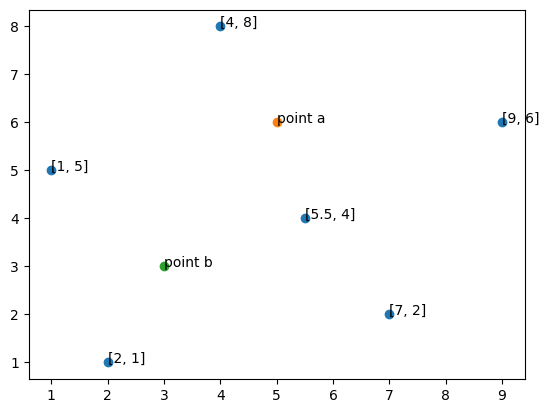

In [ ]:
fig, _ = plt.subplots()

plt.scatter(*zip(*z))
# print(*zip(*z))
n = [str(i) for i in z]

for i, txt in enumerate(n):
    plt.annotate(txt, (z[i][0], z[i][1]))

plt.annotate('point a', pointa)
plt.annotate('point b', pointb)

plt.scatter(pointa[0],pointa[1])
plt.scatter(pointb[0],pointb[1])

In [ ]:
plt.close(fig)

## Standard deviation

For any vector $x$, the vector $\tilde{x}=x-\operatorname{avg}(x) \mathbf{1}$ is called the associated _de-meaned_ vector, obtained by subtracting from each entry of $x$ the mean value of the entries. (This is not standard notation; i.e., $\tilde{x}$ is not generally used to denote the de-meaned vector.) The mean value of the entries of $\tilde{x}$ is zero, i.e., $\operatorname{avg}(\tilde{x})=0$. This explains why $\tilde{x}$ is called the de-meaned version of $x$; it is $x$ with its mean removed. The de-meaned vector is useful for understanding how the entries of a vector deviate from their mean value. It is zero if all the entries in the original vector $x$ are the same.

The standard deviation of an $n$-vector $x$ is defined as the RMS value of the de-meaned vector $x-\operatorname{avg}(x) \mathbf{1}$, i.e.,
$$
\operatorname{std}(x)=\sqrt{\frac{\left(x_1-\operatorname{avg}(x)\right)^2+\cdots+\left(x_n-\operatorname{avg}(x)\right)^2}{n}}.
$$
This is the same as the RMS deviation between a vector $x$ and the vector all of whose entries are $\operatorname{avg}(x)$. It can be written using the inner product and norm as
$$
\operatorname{std}(x)=\frac{\left\|x-\left(\mathbf{1}^T x / n\right) \mathbf{1}\right\|}{\sqrt{n}}.
$$
The standard deviation of a vector $x$ tells us the typical amount by which its entries deviate from their average value. The standard deviation of a vector is zero only when all its entries are equal. The standard deviation of a vector is small when the entries of the vector are nearly the same.

In [ ]:
# De-meaning is useful for understanding how entries of a vector deviate
# from the mean also gives us SD in terms of norm
de_mean = lambda x: x - np.average(x)
x = np.array([1,-2.2,3])

print(f'the average of x: {np.average(x)}')
print(f'the de-mean of x: {de_mean(x)}')
print(f'the average of the de-mean of x: {np.average(de_mean(x)).round()}')

the average of x: 0.6
the de-mean of x: [ 0.4 -2.8  2.4]
the average of the de-mean of x: -0.0


In [ ]:
# Standard deviation is RMS of a de-meaned vector
# gives the typical amount that vector values deviate from mean
x = np.random.rand(100)
stdev = lambda x: npl.norm(x - np.average(x))/np.sqrt(len(x))


print(f'the standard deviation of x: {stdev(x)}')
print(f'the standard deviation of x: {np.std(x)}')

the standard deviation of x: 0.27610002512269355
the standard deviation of x: 0.27610002512269355


##### Average, RMS value, and standard deviation

The average, RMS value, and standard deviation of a vector are related by the formula
$$
\operatorname{rms}(x)^2=\operatorname{avg}(x)^2+\operatorname{std}(x)^2.
$$

In [ ]:
import numpy as np
import numpy.linalg as npl

rms = lambda x: npl.norm(x) / np.sqrt(len(x))
LHS = rms(x) ** 2
RHS = np.average(x) ** 2 + np.std(x) ** 2
print(LHS)
print(RHS)

NameError: name 'x' is not defined

#### Example

> ##### Mean return and risk
>
> Suppose that an $n$-vector represents a time series of return on an investment, expressed as a percentage, in $n$ time periods over some interval of time. Its average gives the mean return over the whole interval, often shortened to its return. Its standard deviation is a measure of how variable the return is, from period to period, over the time interval, i.e., how much it typically varies from its mean, and is often called the (per period) risk of the investment. Multiple investments can be compared by plotting them on a risk-return plot, which gives the mean and standard deviation of the returns of each of the investments over some interval. A desirable return history vector has high mean return and low risk; this means that the returns in the different periods are consistently high.

the return of a is: 1.0,
the risk of a is: 0.0
the return of b is: 2.3,
the risk of b is: 2.4103941586387903
the return of c is: 2.6,
the risk of c is: 3.7735924528226414
the return of d is: 1.2,
the risk of d is: 4.308131845707604


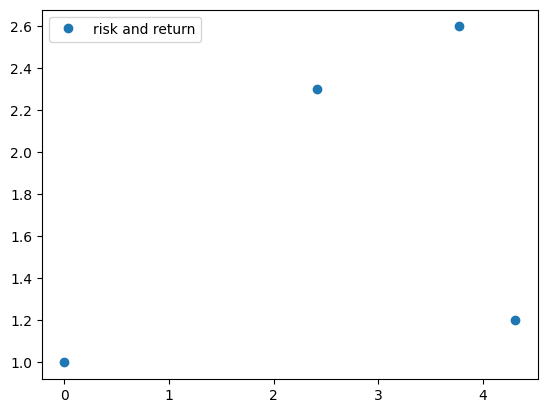

In [ ]:
a = np.ones(10)
print(f'the return of a is: {np.mean(a)},\nthe risk of a is: {np.std(a)}')

b = np.array([ 5, 1, -2, 3, 6, 3, -1, 3, 4, 1 ])
print(f'the return of b is: {np.mean(b)},\nthe risk of b is: {np.std(b)}')

c = np.array([ 5, 7, -2, 2, -3, 1, -1, 2, 7, 8 ])
print(f'the return of c is: {np.mean(c)},\nthe risk of c is: {np.std(c)}')

d = np.array([ -1, -3, -4, -3, 7, -1, 0, 3, 9, 5 ])
print(f'the return of d is: {np.mean(d)},\nthe risk of d is: {np.std(d)}')

investments = [a, b, c, d]
returns = []
risks = []
for item in investments:
  returns.append(np.mean(item))
  risks.append(np.std(item))

fig, _ = plt.subplots()
# plt.plot(a, 'o-', label='a')
# plt.plot(b, 'o-', label='b')
# plt.plot(c, 'o-', label='c')
# plt.plot(d, 'o-', label='d')
plt.plot(risks, returns,  'o', label='risk and return')
plt.legend(loc=0)

In [ ]:
plt.close(fig)

#### Standardization.

For any vector $x$, we refer to $\tilde{x}=x-\mathbf{a v g}(x) \mathbf{1}$ as the de-meaned version of $x$, since it has average or mean value zero. If we then divide by the RMS value of $\tilde{x}$ (which is the standard deviation of $x$ ), we obtain the vector
$$
z=\frac{1}{\operatorname{std}(x)}(x-\operatorname{avg}(x) \mathbf{1})
$$

This vector is called the standardized version of $x$. It has mean zero, and standard deviation one. Its entries are sometimes called the $z$-scores associated with the original entries of $x$. For example, $z_4=1.4$ means that $x_4$ is 1.4 standard deviations above the mean of the entries of $x$.

> The standardized values for a vector give a simple way to interpret the original values in the vectors. For example, if an $n$-vector $x$ gives the values of some medical test of $n$ patients admitted to a hospital, the standardized values or $z$ scores tell us how high or low, compared to the population, that patient's value is. A value $ z_6=-3.2 $, for example, means that patient 6 has a very low value of the measurement; whereas $z_{22}=0.3$ says that patient 22's value is quite close to the average value.

In [ ]:
standardize = lambda x: (x - np.average(x)) / rms(x - np.average(x))
x = np.random.rand(100)
# print(x)
z = standardize(x)

print(f'average: {np.mean(x)}\n'
      f'mean {np.std(x)}\n'
      f'standardized average: {np.mean(z).round()}\n'
      f'standardized mean: {np.std(z)}')

print(x, z)

average: 0.4671278255900632
mean 0.291693680614224
standardized average: 0.0
standardized mean: 0.9999999999999999
[4.36616492e-02 5.77863895e-01 9.95565720e-01 2.25821916e-01
 9.45795515e-01 1.54850641e-02 7.17547360e-01 3.42766039e-01
 1.19686509e-01 4.96692599e-01 1.27901574e-01 6.40276804e-01
 1.06952732e-01 1.73071131e-01 5.22094175e-01 1.01717340e-01
 1.39752701e-02 3.38975178e-01 4.62833363e-01 2.30765377e-01
 9.20339135e-01 5.77479688e-02 1.12788027e-01 7.75284886e-01
 9.11894873e-01 3.24285479e-01 7.24464737e-01 8.11817409e-01
 3.00438245e-01 8.18685325e-01 3.57183846e-01 5.50298814e-02
 5.61048938e-01 9.69439010e-02 8.16108256e-01 6.14606509e-01
 9.27776992e-04 4.23220919e-01 4.31215122e-01 2.16070020e-02
 6.87893006e-01 5.11745180e-01 3.37766476e-01 4.60566093e-01
 1.49682332e-01 7.50561399e-01 1.91918450e-01 6.14456385e-01
 6.44376807e-01 9.10955623e-01 6.73594975e-01 8.24934743e-01
 9.21423268e-01 2.07478089e-01 2.78546897e-01 1.74901366e-01
 6.10819451e-01 6.45907991e-01 

## Angle

#####Angle between vectors.

The angle between two nonzero vectors $a, b$ is defined as
$$
\theta=\arccos \left(\frac{a^T b}{\|a\|\|b\|}\right)
$$
where arccos denotes the inverse cosine, normalized to lie in the interval $[0, \pi]$. In other words, we define $\theta$ as the unique number between 0 and $\pi$ that satisfies
$$
a^T b=\|a\|\|b\| \cos \theta .
$$

In [ ]:
# angle
ang = lambda x,y: np.arccos(np.inner(x,y)/(npl.norm(x)*npl.norm(y)))
a,b = [1,2,-1],[2,0,-3]
print(ang(a,b), ang(a,b)*(360/(2*np.pi)))

0.9689825515916383 55.51861062801842


#### Examples

> ##### Spherical distance.
>
> Suppose $a$ and $b$ are 3-vectors that represent two points that lie on a sphere of radius $R$ (for example, locations on earth). The spherical distance between them, measured along the sphere, is given by $R \angle(a, b)$.

> Document similarity via angles.
>
> If $n$-vectors $x$ and $y$ represent the word counts for two documents, their angle $L(x, y)$ can be used as a measure of document dissimilarity. (When using angle to measure document dissimilarity, either word counts or histograms can be used; they produce the same result.)

#### Correlation coefficient.

Suppose $a$ and $b$ are $n$-vectors, with associated de-meaned vectors
$$
\tilde{a}=a-\operatorname{avg}(a) \mathbf{1}, \quad \tilde{b}=b-\operatorname{avg}(b) \mathbf{1}.
$$

Assuming these de-meaned vectors are not zero (which occurs when the original vectors have all equal entries), we define their correlation coefficient as
$$
\rho=\frac{\tilde{a}^T \tilde{b}}{\|\tilde{a}\|\|\tilde{b}\|} .
$$

Thus, $\rho=\cos \theta$, where $\theta=\angle(\tilde{a}, \tilde{b})$. We can also express the correlation coefficient in terms of the vectors $u$ and $v$ obtained by standardizing $a$ and $b$. With $u=\tilde{a} / \operatorname{std}(a)$ and $v=\tilde{b} / \operatorname{std}(b)$, we have
$$
\rho=u^T v / n .
$$
(We use $\|u\|=\|v\|=\sqrt{n}$.)

This is a symmetric function of the vectors: The correlation coefficient between $a$ and $b$ is the same as the correlation coefficient between $b$ and $a$. The CauchySchwarz inequality tells us that the correlation coefficient ranges between -1 and +1 . For this reason, the correlation coefficient is sometimes expressed as a percentage. For example, $\rho=30 \%$ means $\rho=0.3$. When $\rho=0$, we say the vectors are uncorrelated. (By convention, we say that a vector with all entries equal is uncorrelated with any vector.)

0.0040209766613670496


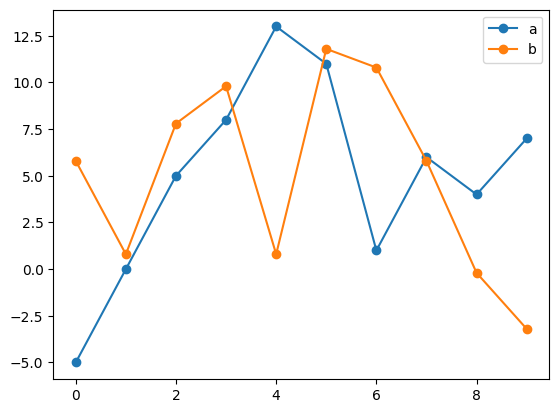

In [ ]:
import matplotlib.pyplot as plt


def correl_coef(a,b):
    a_tilde = a - np.average(a)
    b_tilde = b - np.average(b)
    return ((np.inner(a_tilde, b_tilde))/
            (npl.norm(a_tilde)*npl.norm(b_tilde)))

# a = np.array([4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -.6, 7.4])
# b = np.array([6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2])

# a = np.array([4.1, 10.1, 15.1, 13.1, 7.1, 2.1, -2.9, -5.9, 0.1, 7.1])
# b = np.array([5.5, -0.5, -4.5, -3.5, 1.5, 7.5, 13.5, 14.5, 11.5, 4.5])

a = np.array([-5.0, 0.0, 5.0, 8.0, 13.0, 11.0, 1.0, 6.0, 4.0, 7.0])
b = np.array([5.8, 0.8, 7.8, 9.8, 0.8, 11.8, 10.8, 5.8, -0.2, -3.2])
print(correl_coef(a,b))

fig, _ = plt.subplots()
plt.plot(a, 'o-', label='a')
plt.plot(b, 'o-', label='b')
plt.legend(loc=0)
plt.show()
plt.close(fig)

## Complexity

* Computing the norm of an $n$-vector requires $n$ multiplications (to square each entry), $n-1$ additions (to add the squares), and one squareroot. Even though computing the squareroot typically takes more time than computing the product or sum of two numbers, it is counted as just one flop. So computing the norm takes $2 n$ flops.

* The cost of computing the RMS value of an $n$-vector is the same, since we can ignore the two flops involved in division by $\sqrt{n}$.

* Computing the distance between two vectors costs $3 n$ flops, and computing the angle between them costs $6 n$ flops.

All of these operations have order $n$.

* De-meaning an $n$-vector requires $2 n$ flops ( $n$ for forming the average and another $n$ flops for subtracting the average from each entry).

* The standard deviation is the RMS value of the de-meaned vector, and this calculation takes $4 n$ flops ( $2 n$ for computing the de-meaned vector and $2 n$ for computing its RMS value).

* We can suggests a slightly more efficient method with a complexity of $3 n$ flops: first compute the average ( $n$ flops) and RMS value ( $2 n$ flops), and then find the standard deviation as $\operatorname{std}(x)=\left(\mathbf{r m s}(x)^2-\mathbf{a v g}(x)^2\right)^{1 / 2}$.
* Standardizing an $n$-vector costs $5 n$ flops.
* The correlation coefficient between two vectors costs $10 n$ flops to compute.

These operations also have order $n$.

* As a slightly more involved computation, suppose that we wish to determine the nearest neighbor among a collection of $k$ $n$-vectors $z_1, \ldots, z_k$ to another $n$-vector $x$. (This will come up in the next chapter.) The simple approach is to compute the distances $\left\|x-z_i\right\|$ for $i=1, \ldots, k$, and then find the minimum of these. (Sometimes a comparison of two numbers is also counted as a flop.) The cost of this is $3 \mathrm{kn}$ flops to compute the distances, and $k-1$ comparisons to find the minimum. The latter term can be ignored, so the flop count is $3 \mathrm{kn}$. The order of finding the nearest neighbor in a collection of $k$ $n$-vectors is $k n$.